In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs
!ls german-traffic-sign
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import random
import pickle
import pandas as pd
import cv2
from PIL import Image

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.
'ls' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
 
%matplotlib inline
np.random.seed(0)
# TODO: Implement load the data here.
with open('german-traffic-signs/train.p', 'rb') as f:
    train_data = pickle.load(f)
with open('german-traffic-signs/valid.p', 'rb') as f:
    val_data = pickle.load(f)
# TODO: Load test data
with open('german-traffic-signs/test.p', 'rb') as f:
    test_data = pickle.load(f)
 

In [4]:
# Spliting out features and labels
X_train, y_train = train_data['features'], train_data['labels']
X_val, y_val = val_data['features'], val_data['labels']
X_test, y_test = test_data['features'], test_data['labels']

In [5]:
#already 4 dimensional
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)


(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [6]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3."
assert(X_val.shape[0] == y_val.shape[0]), "The number of images is not equal to the number of labels."
assert(X_val.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3."

In [7]:
data = pd.read_csv('german-traffic-signs/signnames.csv')
print(data)

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vechiles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

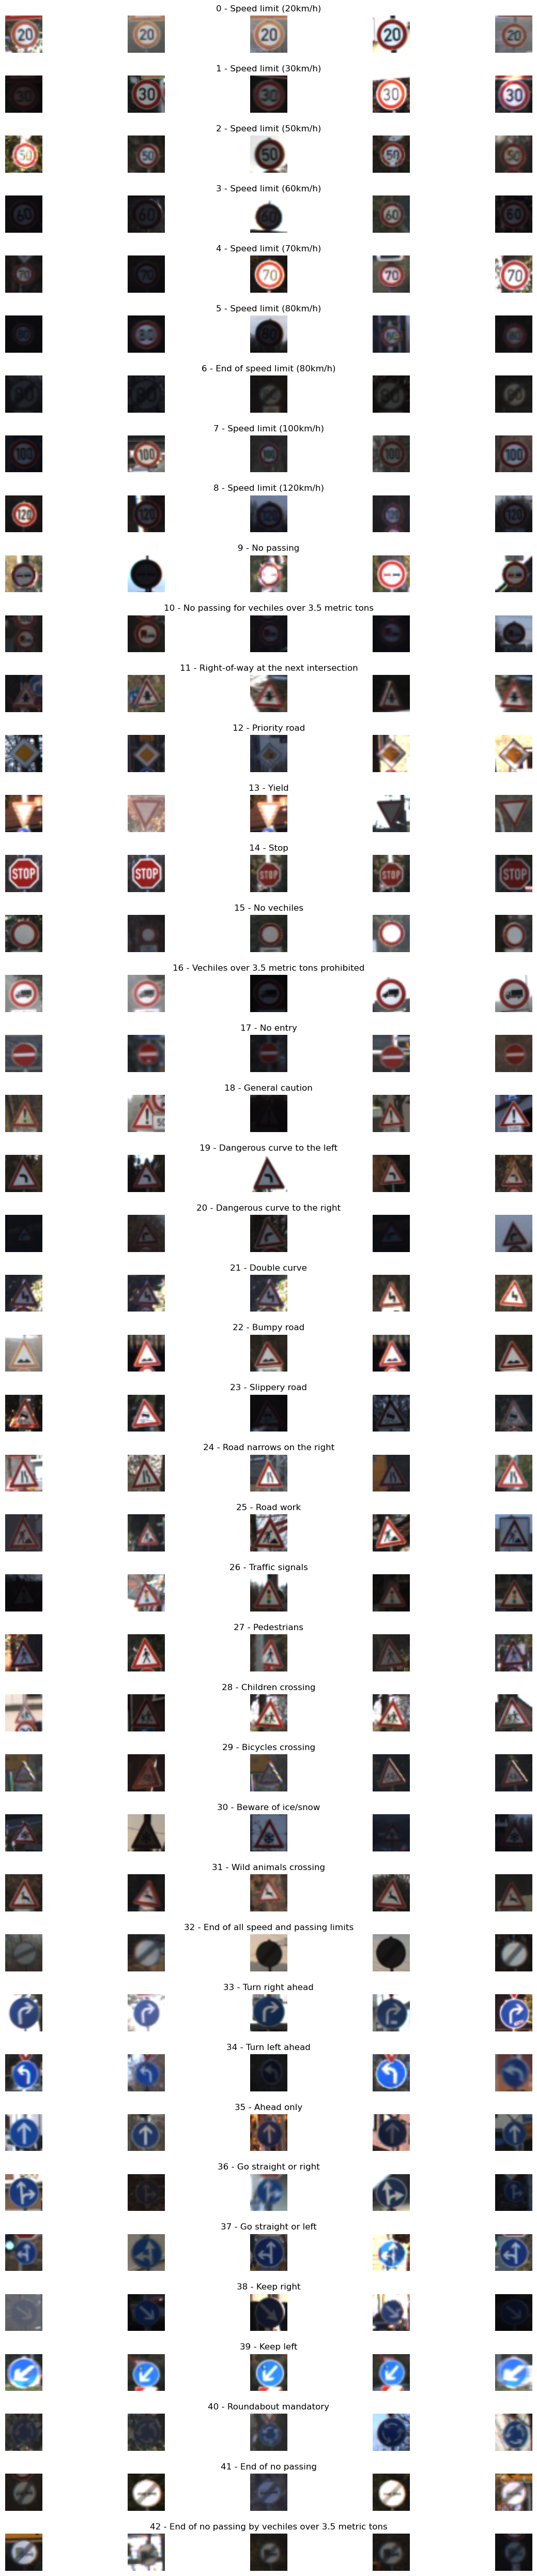

In [8]:
# Assuming 'data' contains the class names
data = pd.read_csv('german-traffic-signs/signnames.csv')
num_of_samples = []
cols = 5
num_classes = 43

# Ensuring that the number of subplots matches the number of classes
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(12, 50))
fig.tight_layout()

for i in range(cols):
      for j, row in data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
        axs[j][i].axis("off")
        if i == 2:
          axs[j][i].set_title(str(j) + " - " + row["SignName"])
          num_of_samples.append(len(x_selected))


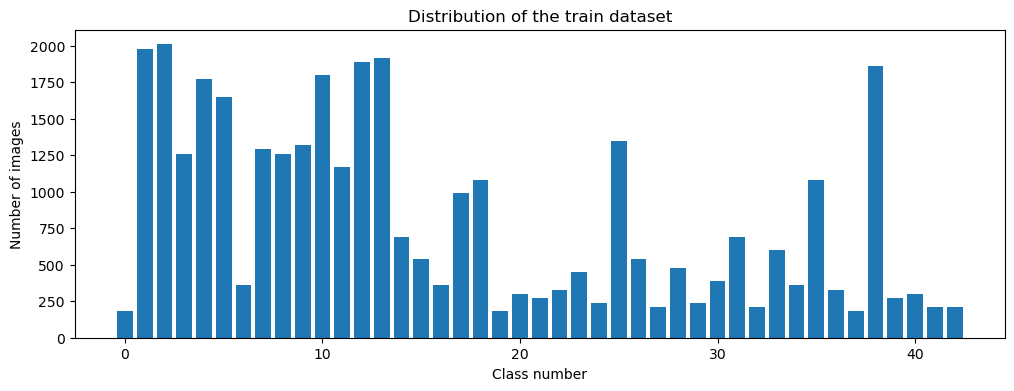

In [9]:
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [10]:
import cv2
import pandas as pd

# Defining grayscale and equalization functions
def grayscale(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img_gray

def equalize(img):
    img_equalized = cv2.equalizeHist(img)
    return img_equalized

(32, 32, 3)
36


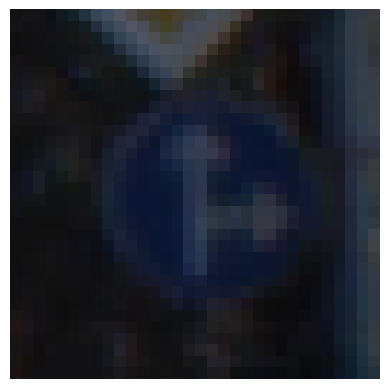

In [11]:
import cv2
 
plt.imshow(X_train[1000])
plt.axis("off")
print(X_train[1000].shape)
print(y_train[1000])
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

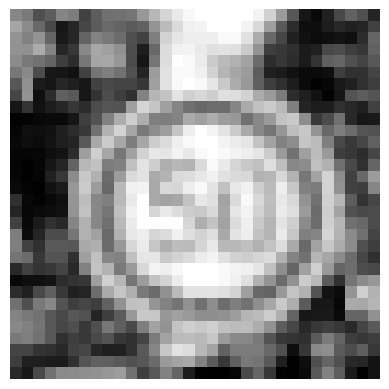

(34799, 32, 32)


In [12]:
import matplotlib.pyplot as plt
import random

def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

def equalize(img):
    img = cv2.equalizeHist(img)
    return img

def preprocess(img):
    img = grayscale(img)
    img = equalize(img)
    img = img / 255
    return img

X_train = np.array(list(map(preprocess, X_train)))
X_test = np.array(list(map(preprocess, X_test)))
X_val = np.array(list(map(preprocess, X_val)))

# Display a random grayscale image
plt.imshow(X_train[random.randint(0, len(X_train) - 1)], cmap='gray')
plt.axis('off')
plt.show()
print(X_train.shape)

# Reshape the data
X_train = X_train.reshape(34799, 32, 32, 1)
X_test = X_test.reshape(12630, 32, 32, 1)
X_val = X_val.reshape(4410, 32, 32, 1)



In [13]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(34799, 32, 32, 1)
(12630, 32, 32, 1)
(4410, 32, 32, 1)


In [14]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Defining the data augmentation generator
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    shear_range=0.1,
    rotation_range=10)
# Fitting the data augmentation generator on the training data
datagen.fit(X_train)


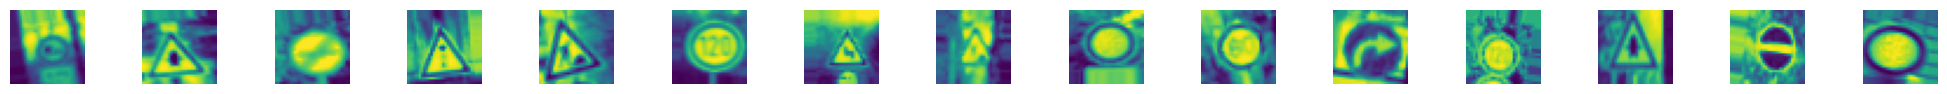

In [15]:


# Generating augmented data batches
batches = datagen.flow(X_train, y_train,batch_size=20)
X_batch, y_batch = next(batches)

# Visualizing the augmented images
fig, axs = plt.subplots(1, 15, figsize=(20, 5))
fig.tight_layout()

for i in range(15):
    axs[i].imshow(X_batch[i].reshape(32, 32)) # Assuming grayscale images
    axs[i].axis("off")




In [16]:
# Converting the labels to one-hot encoded format for train, test, and validation sets
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
y_val = to_categorical(y_val, 43)


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

def modified_model():
    model = Sequential()
    model.add(Conv2D(60, (5, 5), input_shape=(32, 32, 1), activation='relu'))
    model.add(Conv2D(60, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(30, (3, 3), activation='relu'))
    model.add(Conv2D(30, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(43, activation='softmax'))
    
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = modified_model()
print(model.summary())


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 60)     │         1,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 24, 24, 60)     │        90,060 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 12, 12, 60)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 10, 10, 30)     │        16,230 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 30)       │         8,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 30)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 480)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 500)            │       240,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 43)             │        21,543 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 378,023 (1.44 MB)

 Trainable params: 378,023 (1.44 MB)

 Non-trainable params: 0 (0.00 B)

None


In [21]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=50),
    steps_per_epoch=2000,
    epochs=10,
    validation_data=(X_val, y_val),
    shuffle=True
)


Epoch 1/10
   3/2000 ━━━━━━━━━━━━━━━━━━━━ 1:20 40ms/step - accuracy: 0.0322 - loss: 3.7638

C:\Apps\Anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 695/2000 ━━━━━━━━━━━━━━━━━━━━ 44s 34ms/step - accuracy: 0.2941 - loss: 2.6157

C:\Apps\Anaconda\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 27s 13ms/step - accuracy: 0.4288 - loss: 2.0595 - val_accuracy: 0.9084 - val_loss: 0.2926
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 30s 15ms/step - accuracy: 0.8171 - loss: 0.5888 - val_accuracy: 0.9671 - val_loss: 0.1168
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.8921 - loss: 0.3463 - val_accuracy: 0.9737 - val_loss: 0.0899
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 34s 17ms/step - accuracy: 0.9219 - loss: 0.2474 - val_accuracy: 0.9751 - val_loss: 0.0974
Epoch 5/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 34s 17ms/step - accuracy: 0.9381 - loss: 0.2014 - val_accuracy: 0.9814 - val_loss: 0.0661
Epoch 6/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 34s 17ms/step - accuracy: 0.9448 - loss: 0.1736 - val_accuracy: 0.9866 - val_loss: 0.0512
Epoch 7/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 34s 17ms/step - accuracy: 0.9498 - loss: 0.1611 - val_accuracy: 0.9848 - val_loss: 0.0532
Epoch 8/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 36s 18ms/step - accuracy: 0.9594 - loss: 0.13

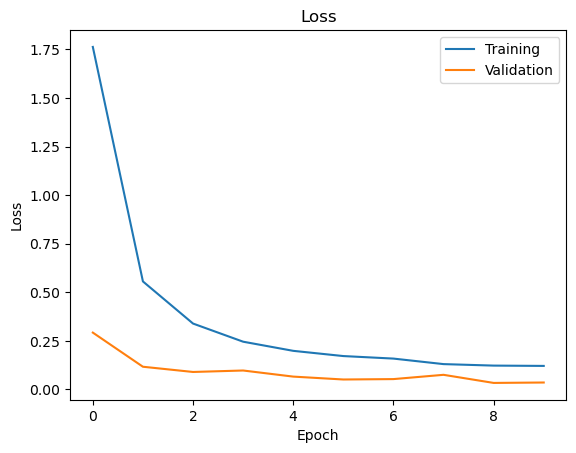

In [46]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])  # Corrected legend syntax
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')  # Added ylabel for clarity
plt.show()



Text(0.5, 0, 'epoch')

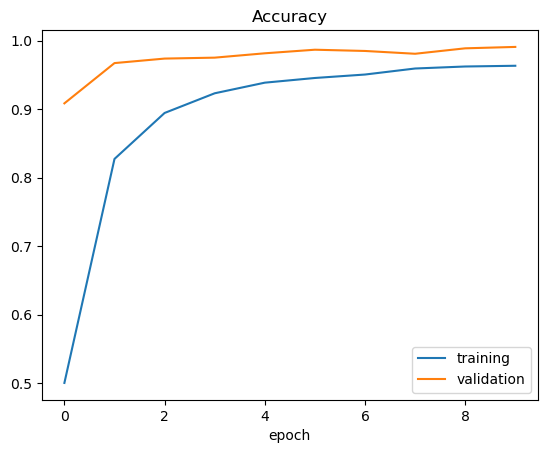

In [47]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')
 


In [48]:
# Evaluating model on test data
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.10784535109996796
Test accuracy: 0.9752969145774841


In [49]:
# Evaluating model on training data
train_score = model.evaluate(X_train, y_train, verbose=0)
print('Training score:')
print('  Loss:', train_score[0])
print('  Accuracy:', train_score[1])

# Evaluating model on validation data
val_score = model.evaluate(X_val, y_val, verbose=0)
print('Validation score:')
print('  Loss:', val_score[0])
print('  Accuracy:', val_score[1])


Training score:
  Loss: 0.016071079298853874
  Accuracy: 0.9951435327529907
Validation score:
  Loss: 0.035643890500068665
  Accuracy: 0.9907029271125793


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: 29


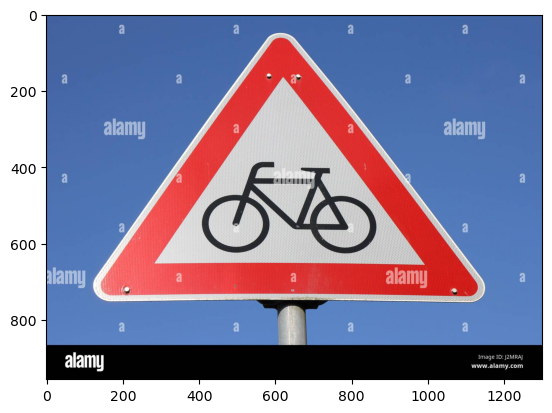

In [42]:
# Predicting internet image
import requests
from PIL import Image
import numpy as np
import cv2

# URL of the image
url = 'https://c8.alamy.com/comp/J2MRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg'

# Downloading and loading the image
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

# Converting the image to grayscale, resize, and preprocess
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocess(img)
img = img.reshape(1, 32, 32, 1)

# Predicting the class probabilities
predictions = model.predict(img)

# Getting the index with the highest probability
predicted_class = np.argmax(predictions)

print("Predicted class:", predicted_class)


THE END. THANK YOU!